## Armenian Data Cube - Shoreline Delineation Notebook

**Description:** 
This Python notebook allows users to  monitor small water area and particularly study of changes of shorelines combining Sentinel 2 and UAV photogrammetry. The script is structured as follows:

**Step 1: Preprocessing**
- Read RGB image from UAV image using bands and take from metadata the boundaries. 
- Using that boundaries, fetch data from Datacube for Sentinel 2 for the closest date to the UAV image data.  The used bands are ['green','red', ‘blue’, 'nir', 'swir1', 'swir2' ].


**Step 2: To identify and extract water bodies**
- BandRatio = B3/B8
- McFeeters = (B3 - B8) / (B3 + B8)
- MSAVI12 = (2*B8 + 1 - xu.sqrt((2*B8)*(2*B8) - 8*(B8 - B4))) / 2
- MNDWI1 = (B3 - B11) / (B3 + B11)
- MNDWI2 = (B3 - B12) / (B3 + B12)

**Step 3: To extract coastline**
- K-means clustering method
- Gaussian Blur
- Canny edge detection

After these steps we will have the shoreline matrix where in the positions of the line will have values 1 and the other positions 0.

**Step 4: To compere UAV and Satelite images**
- Mask the shoreline matrix with initial images
- Get the coordinates in (lat,long) pairs 
- For each Satellite image shoreline point to find the nearest points from the UAV image with Euclidean distance and calculate the RMSE for the whole line

**Import necessary Data Cube libraries and dependencies.**

Starting process for TIFF:  data/2018_09_15_Draxtik_WGS84_cliped.tif , in date Range:  2018-09-09 00:00:00 - 2018-09-19 00:00:00
Executing Step 1
Reading metadata
Fetching data from Datacube
<xarray.Dataset>
Dimensions:    (latitude: 54, longitude: 75, time: 4)
Coordinates:
  * time       (time) datetime64[ns] 2018-09-09T08:02:07 ... 2018-09-16T07:47:19.500000
  * latitude   (latitude) float64 40.52 40.52 40.52 40.52 ... 40.52 40.52 40.52
  * longitude  (longitude) float64 45.24 45.24 45.24 45.24 ... 45.24 45.24 45.24
Data variables:
    green      (time, latitude, longitude) int16 1000 1000 1000 ... -9999 -9999
    red        (time, latitude, longitude) int16 962 918 918 ... -9999 -9999
    blue       (time, latitude, longitude) int16 871 869 869 ... -9999 -9999
    nir        (time, latitude, longitude) int16 2022 2128 2128 ... -9999 -9999
    swir1      (time, latitude, longitude) int16 1749 1749 1749 ... -9999 -9999
    swir2      (time, latitude, longitude) int16 1192 1192 1192 ..

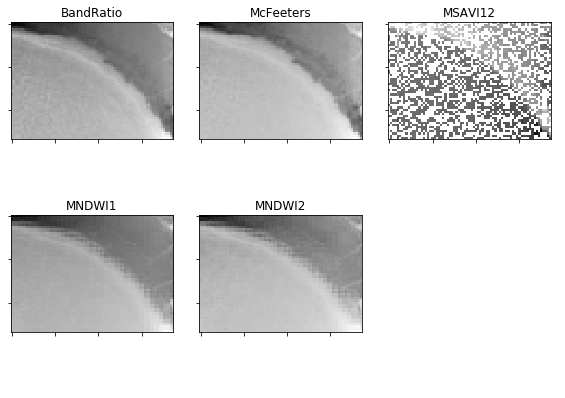

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


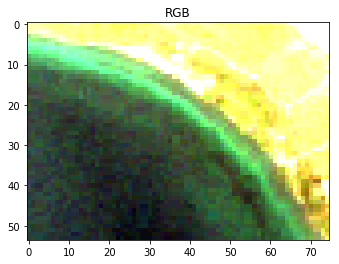

Step 3 for UAV


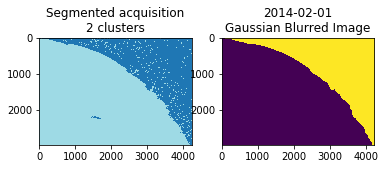

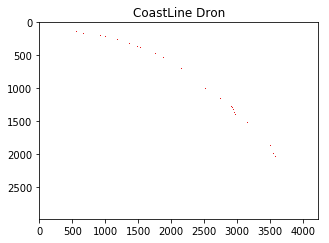

In [1]:
from logic import *
show()